In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Import the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import umap

In [2]:
# --- 1. Load the Dataset ---
digits = load_digits()
X = digits.data
y = digits.target

print(f"Original data shape: {X.shape}")

Original data shape: (1797, 64)


In [3]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1437, 64)
Testing data shape: (360, 64)


In [4]:
# --- 3. Apply UMAP for Dimensionality Reduction to 3D ---
# Set n_components=3 for a 3D embedding
reducer = umap.UMAP(n_neighbors=15,
                    min_dist=0.1,
                    n_components=3,
                    random_state=42)

In [5]:
# Fit UMAP on the training data and transform both sets
X_train_umap = reducer.fit_transform(X_train)
X_test_umap = reducer.transform(X_test)

print(f"UMAP transformed training data shape (3D): {X_train_umap.shape}")
print(f"UMAP transformed testing data shape (3D): {X_test_umap.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP transformed training data shape (3D): (1437, 3)
UMAP transformed testing data shape (3D): (360, 3)


In [6]:

# --- 4. Train a Machine Learning Algorithm on 3D UMAP-Transformed Data ---
# KNN works fine with 3 input features
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the 3D UMAP embeddings
knn.fit(X_train_umap, y_train)


KNeighborsClassifier()

In [7]:
# --- 5. Evaluate the Machine Learning Algorithm ---
y_pred = knn.predict(X_test_umap)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN on 3D UMAP-reduced test data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))


Accuracy of KNN on 3D UMAP-reduced test data: 0.9806

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



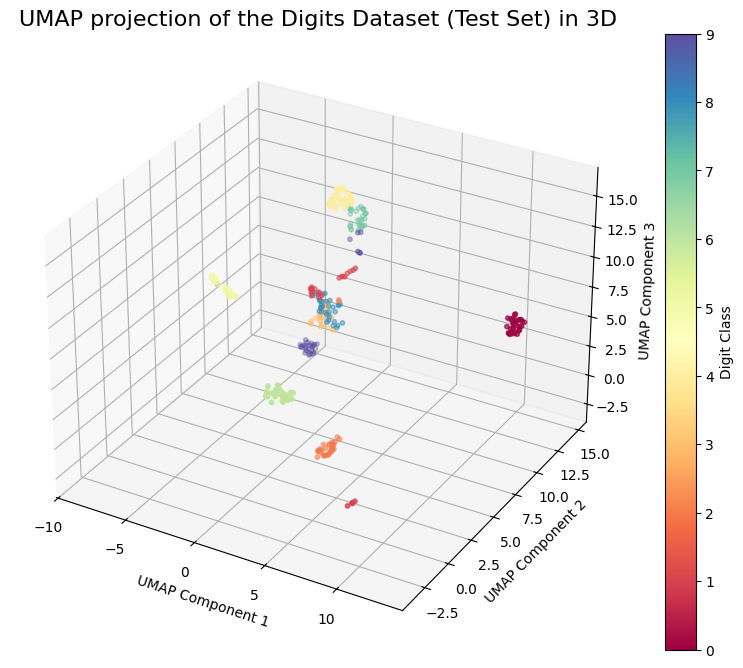

In [8]:
# --- 6. Visualize the 3D UMAP Embedding ---
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # <-- Use 3D projection

# Scatter plot the 3D points, colored by true labels
scatter = ax.scatter(X_test_umap[:, 0], X_test_umap[:, 1], X_test_umap[:, 2], # <-- Use all 3 dimensions
                     c=y_test, cmap='Spectral', s=10) # Increased marker size for 3D

ax.set_title('UMAP projection of the Digits Dataset (Test Set) in 3D', fontsize=16)
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3') # <-- Add Z-axis label

# Add a color bar
cbar = fig.colorbar(scatter, label='Digit Class')

plt.show()

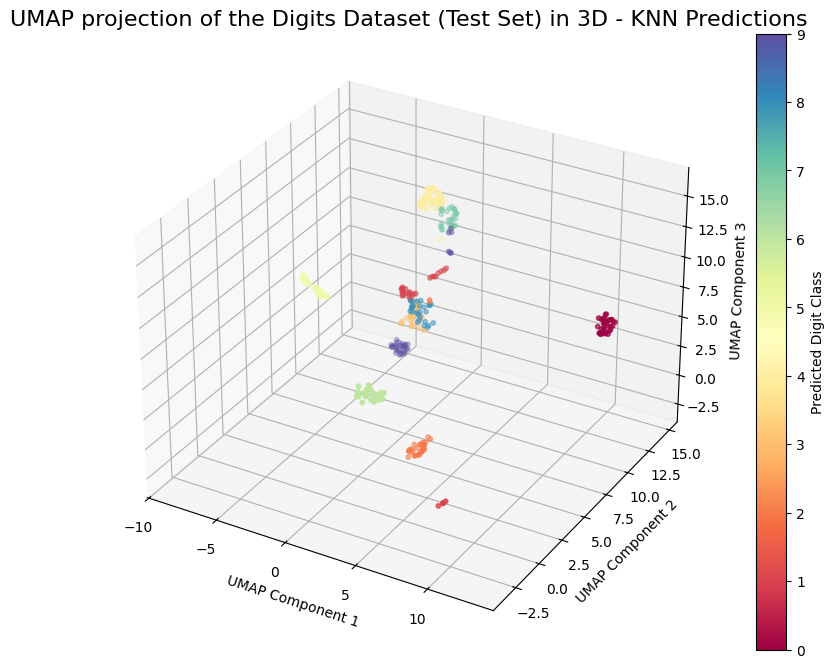

In [9]:

# Visualize the 3D UMAP embedding colored by predicted labels
fig_pred = plt.figure(figsize=(10, 8))
ax_pred = fig_pred.add_subplot(111, projection='3d')

scatter_pred = ax_pred.scatter(X_test_umap[:, 0], X_test_umap[:, 1], X_test_umap[:, 2],
                               c=y_pred, cmap='Spectral', s=10)

ax_pred.set_title('UMAP projection of the Digits Dataset (Test Set) in 3D - KNN Predictions', fontsize=16)
ax_pred.set_xlabel('UMAP Component 1')
ax_pred.set_ylabel('UMAP Component 2')
ax_pred.set_zlabel('UMAP Component 3')

cbar_pred = fig_pred.colorbar(scatter_pred, label='Predicted Digit Class')

plt.show()